# Ableitung mit mehreren Variablen

## Vertiefung

In [20]:
import numpy as np
import matplotlib.pyplot as plt


### Übersicht

1. Partielle Ableitungen numerisch berechnen
2. Gradient berechnen und darstellen
3. Gradientenverfahren

### 1. Partielle Ableitungen numerisch berechnen

$e^(-x^2)$ Normalverteilung Gaussfunktion

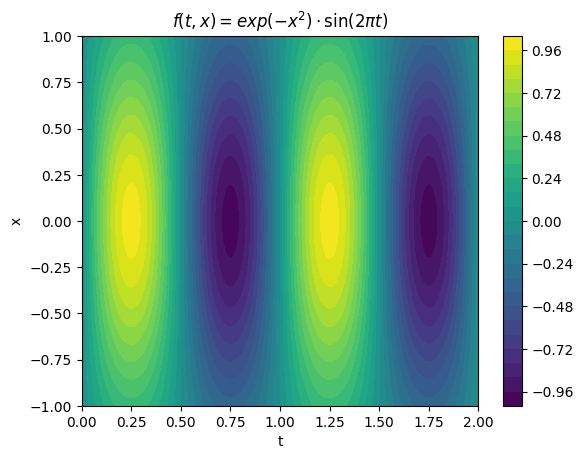

In [21]:
def f(t, x):
    """exp(-x²) · sin(2πt)"""
    return np.exp(-(x**2)) * np.sin(2 * np.pi * t)
#sin -> Wellenbewegung
# $e^-x^2$ Normalverteilung Gaussfunktion

n = 200
t = np.linspace(0, 2, n)
x = np.linspace(-1, 1, n)
T, X = np.meshgrid(t, x)
Z = f(T, X)

plt.contourf(T, X, Z, levels=25)
plt.colorbar()
plt.xlabel("t")
plt.ylabel("x")
plt.title("$f(t,x) = exp(-x^2) \cdot \sin(2\pi t)$")
plt.show()


In [26]:
def dfdx1(f, x1, x2, h=1e-6):
    """Approximation der partiellen Ableitung der ersten Variable x1"""
    return (f(x1 + h, x2) - f(x1 - 1, x2)) / (2 * h)  
    # Vorwärtsdifferenzquotient  bisschen nach vorne schauen und bischen nach hinten
    # x1 wird an verschoben rechts/links , jedoch bleibt x2 fest.

def dfdx2(f, x1, x2, h=1e-6):
    """Approximation der partiellen Ableitung der zweiten Variable x2"""
    return (f(x1,x2 + h) - f(x1, x2 - h)) / (2 * h)


Bei den, linken seite geht man horizontal durch den graphen und beim zweiten links geht man horizontal zum graphen 

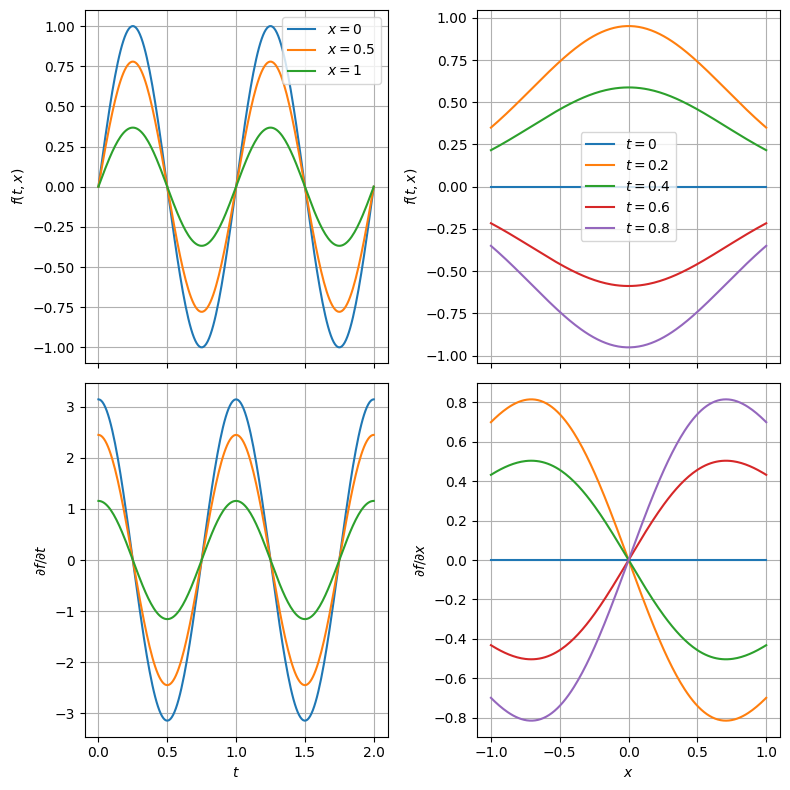

In [25]:
t_levels = [0, 0.2, 0.4, 0.6, 0.8]
x_levels = [0, 0.5, 1]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex="col", figsize=(8, 8))
for xi in x_levels:
    y = f(t, xi)
    y_t = dfdx1(f, t, xi)
    ax1.plot(t, y, label=f"$x={xi}$")
    ax3.plot(t, y_t, label=f"$x={xi}$")
for ti in t_levels:
    y = f(ti, x)
    y_x = dfdx2(f, ti, x)
    ax2.plot(x, y, label=f"$t={ti}$")
    ax4.plot(x, y_x, label=f"$t={ti}$")

ax1.set_ylabel("$f(t, x)$")
ax2.set_ylabel("$f(t, x)$")
ax3.set_ylabel("$\partial f / \partial t$")
ax4.set_ylabel("$\partial f / \partial x$")
ax3.set_xlabel("$t$")
ax4.set_xlabel("$x$")
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.tight_layout()
plt.show()


### 2. Gradient berechnen und darstellen

Der Gradient ist eine Funktion, die jedem Punkt $\vec x = (x_1, x_2, \ldots, x_n)$ den **Vektor aller partiellen Ableitungen** zuordnet:

$$ \text{grad} f(\vec x) = \left( \frac{\partial f}{\partial x_1}(\vec x),  \frac{\partial f}{\partial x_2}(\vec x), \ldots,  \frac{\partial f}{\partial x_n}(\vec x) \right) $$

In 2 Dimensionen, d.h. für Funktionen von 2 Variablen heisst das:

$$ \text{grad} f(x,y) = \left( \frac{\partial f}{\partial x}(x,y),  \frac{\partial f}{\partial y}(x,y) \right) $$


#### Beispiel Himmelblau Funktion

Hier schauen wir uns nochmals ein Beispiel der [Testfunctions for Optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) an, und zwar die [Himmelblau Funktion](https://en.wikipedia.org/wiki/Himmelblau%27s_function):

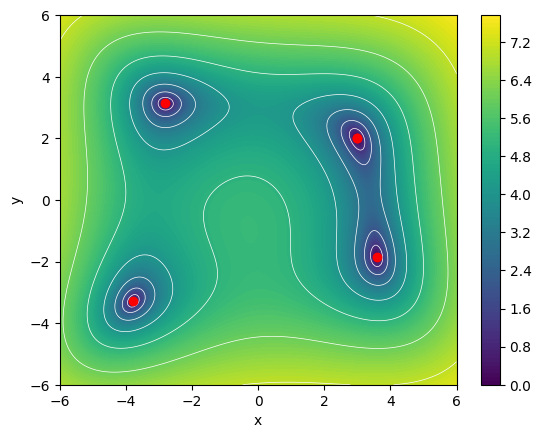

In [34]:
def himmelblau(x, y):
    return (x**2 + y - 11) ** 2 + (x + y**2 - 7) ** 2


x_min = np.array([3, -3.779310, -2.805118, 3, 3.584428])
y_min = np.array([2, -3.283186, 3.131312, 2, -1.848126])

n = 200
x = np.linspace(-6, 6, n)
y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)
logZ = np.log(Z+1) # weil der log0 ins unendliche geht darum addiert man 1 weil log1 = 0 

plt.contourf(X, Y, logZ, levels=100)
plt.colorbar()
plt.contour(X, Y, logZ, colors="white", linewidths=0.5)
plt.plot(x_min, y_min, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


#### Berechnung mit [`np.gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html)

In [ ]:
n2 = 11
x2 = np.linspace(-5, 5, n)
y2 = np.linspace(-5, 5, n)
X2, Y2 = np.meshgrid(x, y)
Z2 = himmelblau(X, Y)
logZ2 = np.log(Z2+1)
#Skalar gibt vom Vektor eine zahl zurück
# Y gibt in der y Achse die 0 Dimension und in der x Achse die 1 dimension 
gradY, gradX = np.gradient(logZ2)



#### Darstellung mit [`plt.quiver`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

NameError: name 'X2' is not defined

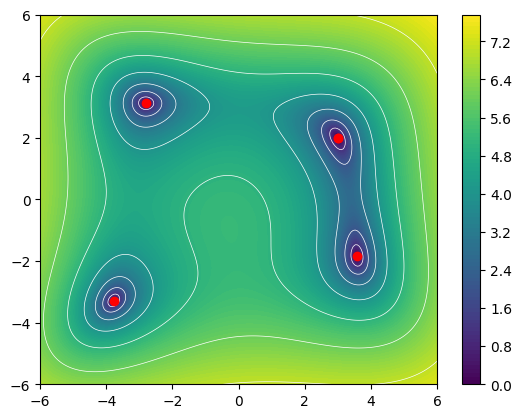

In [36]:
plt.contourf(X, Y, logZ, levels=100)
plt.colorbar()
plt.contour(X, Y, logZ, colors="white", linewidths=0.5)
plt.plot(x_min, y_min, "ro")
plt.quiver(X2, Y2, gradX,gradY, colour= "k")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3. Gradientenverfahren

Das Gradientenverfahren (engl. *Gradient Descent*) ist ein Verfahren, um die Extremstellen einer Funktion zu finden. Es ist ein iteratives Verfahren, das mit einem Startwert $\vec{x}_0$ beginnt und dann immer wieder die Iterationsvorschrift

$$ \vec x_{i+1} = \vec x_i - \alpha_i \cdot \text{grad} f(\vec x_i) $$

anwendet, wobei $\alpha_i$ ein Schrittweitenparameter (auch Lernrate genannt) ist.

Das folgende Video zeigt, wie das Gradientenverfahren funktioniert:

- ["Gradientenverfahren", Georg Hoever](https://www.hm-kompakt.de/video?watch=935)


#### Beispiel Himmelblau Funktion

In [37]:
def grad_himmelblau(x, y):
    return np.array(
        [
            4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7),
            2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7),
        ]
    )


In [38]:
def gradient_descent_2d(grad_f, x0, y0, alpha, tol, max_steps):
    pass


Durchführen, darstellen und mit den Parametern experimentieren.

In [ ]:
x0 = 5.9
y0 = 5.9
alpha = 1e-3
tol = 1e-4
max_steps = 20

res = gradient_descent_2d(grad_himmelblau, x0, y0, alpha, tol, max_steps)

xs, ys, _ = np.array(res).T

plt.contourf(X, Y, logZ, levels=100)
plt.colorbar()
plt.contour(X, Y, logZ, colors="white", linewidths=0.5)
plt.plot(x_min, y_min, "ro")
plt.plot(xs, ys, "wo-")
plt.xlabel("x")
plt.ylabel("y")
plt.quiver(X2, Y2, gradx, grady)
plt.show()